<a href="https://colab.research.google.com/github/aayu-23/Fake-news-detection/blob/main/fakenewsdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re
from wordcloud import WordCloud

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Exploring Fake News

In [6]:
fake = pd.read_csv('/content/drive/MyDrive/NLP/Fake.csv')

In [7]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

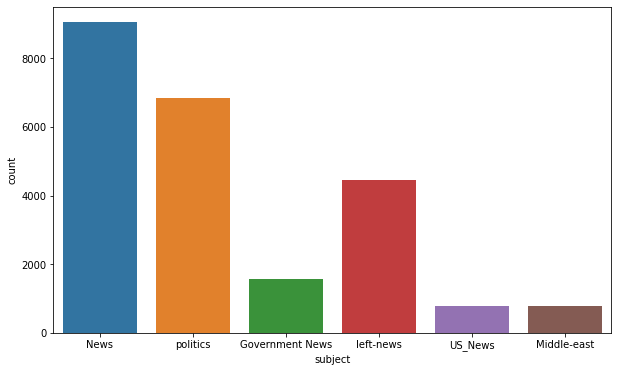

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', data=fake)

## WordCloud

In [11]:
text = ''.join(fake['text'].tolist())

In [12]:
' '.join(['this', 'is', 'a', 'data'])

'this is a data'

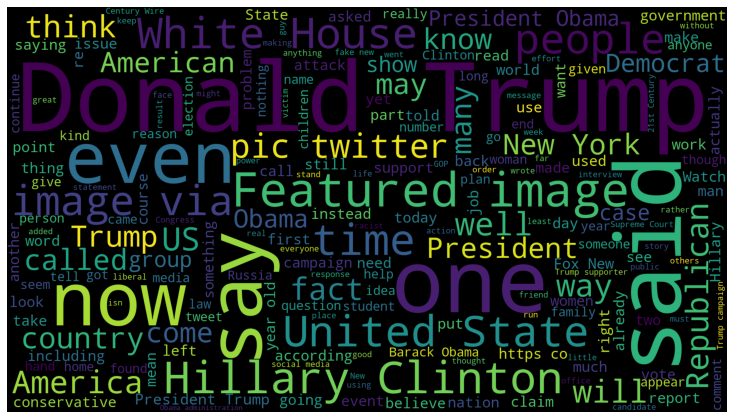

In [13]:
wordcloud = WordCloud(width=1920, height =1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Exploring Real News

In [14]:
real = pd.read_csv('/content/drive/MyDrive/NLP/True.csv')

In [15]:
text = ''.join(real['text'].tolist())

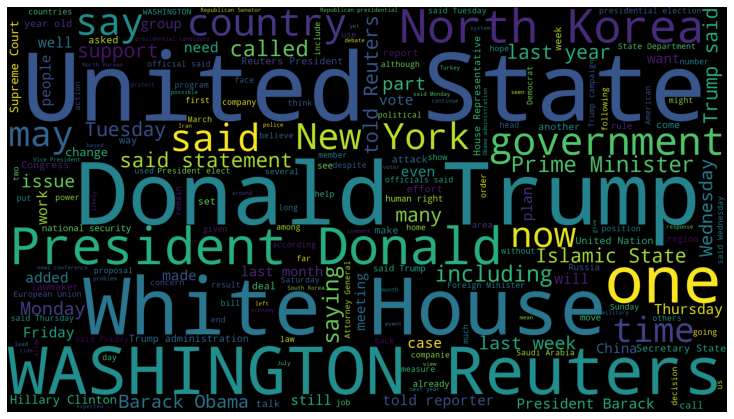

In [16]:
wordcloud = WordCloud(width=1920, height =1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
real.sample(5)

,title,text,subject,date
9690,"'Three Amigos' Obama, Trudeau, Pena Nieto to m...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"May 4, 2016"
831,"Trump, dogged at home, begins longest presiden...",HONOLULU (Reuters) - President Donald Trump ar...,politicsNews,"November 3, 2017"
19530,U.S. 'strongly opposes' Iraqi Kurdish independ...,WASHINGTON (Reuters) - The United States stro...,worldnews,"September 20, 2017"
14102,Chinese police detain seven in multi-billion u...,SHANGHAI (Reuters) - Police in southern China ...,worldnews,"November 23, 2017"
10744,Many U.S. Catholics unfazed by pope's clash wi...,NEW YORK (Reuters) - U.S. Catholics voiced sup...,politicsNews,"February 22, 2016"


In [18]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0])<260)
  except:
      unknown_publishers.append(index)


In [19]:
len(unknown_publishers)

17

In [20]:
real.iloc[unknown_publishers].text


3488    The White House on Wednesday disclosed a group...
4465    WASHINGTON The clock began running out this we...
5784    Federal appeals court judge Neil Gorsuch, the ...
6660    Republican members of Congress are complaining...
8194    The following timeline charts the origin and s...
8195    Global health officials are racing to better u...
8247    U.S. President Barack Obama visited a street m...
8481    Global health officials are racing to better u...
8482    The following timeline charts the origin and s...
8505    Global health officials are racing to better u...
8506    The following timeline charts the origin and s...
8771    In a speech weighted with America’s complicate...
8970                                                     
9008    The following timeline charts the origin and s...
9009    Global health officials are racing to better u...
9307    It’s the near future, and North Korea’s regime...
9737    Caitlyn Jenner posted a video on Wednesday (Ap...
Name: text, dt

In [21]:
publisher = []
tmp_text = []

for index ,row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [22]:
real['publisher']= publisher
real['text']=tmp_text

In [23]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [24]:
real.shape

(21417, 5)

In [25]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [26]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [27]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [28]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())


##Preprocessing text


In [29]:
real['class'] = 1
fake['class'] = 0

In [30]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [31]:
real = real[['text', 'class']]

In [32]:
fake = fake[['text', 'class']]

In [33]:
data=real.append(fake, ignore_index=True)

In [34]:
data.sample(5)

,text,class
42371,busted! black protester caught dressing in kkk...,0
15858,turkey's defense industry says planning 22 pro...,1
21742,trump just threatened to murder 25 million pe...,0
21581,how sh*tty of a birthday must ivanka trump be...,0
24432,idaho republican outrageously says female law...,0


In [35]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm 
!python install beautifulsoup==4.9.1
!pip install textblob==0.15.3

     |████████████████████████████████| 10.4 MB 6.7 MB/s 
     |████████████████████████████████| 2.2 MB 41.4 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 8.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
python3: can't open file 'install': [Errno 2] No such file or directory


In [36]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-4wmsfgmi
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-4wmsfgmi
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=4b3d2a8ef3a0437af8f855be11c3be92c7fd857b9754d5b44cfaad21bf1aadcc
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ctf2lng/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [37]:
import preprocess_kgptalkie as ps

In [38]:
data['text'] = data['text'].apply(lambda x:ps.remove_special_chars(x))

In [39]:
ps.remove_special_chars('this ,. @ # is gre@t')

'this is gret'

In [40]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


##Vectorization - Word2Vec

In [41]:
import gensim

In [42]:
y = data['class'].values

In [43]:
X = [d.split() for d in data['text'].tolist()]

In [44]:
type(X[0])

list

In [45]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [46]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [47]:
len(w2v_model.wv.vocab)


231845

In [48]:
w2v_model.wv['china']

array([-3.6218863 , -3.2977705 , -2.3249774 ,  1.7559488 ,  1.3102678 ,
       -1.957625  ,  2.1068816 ,  1.3536607 ,  3.5119097 , -1.3295456 ,
        1.7296057 ,  3.0352633 , -1.0216258 , -0.12255591,  1.0791568 ,
       -4.3122787 , -3.0741773 , -5.6901774 ,  2.8541415 , -2.8122802 ,
        0.53284454,  4.2776356 ,  0.2832328 ,  2.0902617 ,  8.130535  ,
       -0.17111504,  2.903912  , -0.5037228 , -2.409212  , -3.8087814 ,
        0.28343487,  5.224293  , -2.8389976 , -2.1517973 ,  4.9073343 ,
       -0.1791415 , -3.8750954 , -6.9178615 ,  1.2657924 , -0.00987587,
       -0.81741005,  1.3309091 ,  3.1340365 , -1.1571336 , -1.6371188 ,
        2.1459546 , -2.6399934 , -2.3190088 , -0.48532566, -0.07597341,
        2.0032127 ,  3.3448331 ,  6.6724663 ,  1.8032869 ,  1.5897222 ,
        2.8932414 , -2.6178894 ,  2.9558027 , -3.0299945 ,  1.1356999 ,
        0.6510272 ,  1.5741755 ,  0.49212766, -5.2083516 , -2.7386289 ,
       -1.2565868 , -0.7347012 , -1.1084348 , -0.2285498 ,  0.42

In [49]:
w2v_model.wv['love']

array([-1.1540347 , -0.07433785,  3.9888685 , -0.88307655, -0.7801695 ,
       -0.73461795,  0.00792703,  1.2100619 , -1.7331095 , -0.6640705 ,
       -1.2861487 , -1.5571649 , -1.7831767 ,  0.18849348,  0.5091713 ,
       -1.3917972 ,  2.9350753 , -3.9113243 ,  0.22838153,  3.933528  ,
        2.7838106 ,  2.0433478 ,  3.3519285 , -1.1782175 , -1.0569291 ,
        1.2039763 , -0.5936471 ,  2.1206691 , -0.50429624,  2.106309  ,
       -2.2451236 , -1.9558142 , -2.7368124 ,  0.53979635, -1.451137  ,
        0.6955841 ,  1.447648  , -0.83787715, -0.03231058, -2.7244804 ,
        1.869565  ,  1.5548725 ,  0.47585618, -1.5843817 ,  2.9256978 ,
       -3.0588086 ,  2.0170069 ,  1.6961391 ,  1.5705311 , -4.9712296 ,
       -0.63501984,  2.9557421 , -0.6166546 ,  0.65878916, -1.6025273 ,
        0.04857246, -2.7103176 ,  3.2831502 , -0.16132633, -2.1432767 ,
       -0.15318197,  0.755305  , -0.41909394, -1.3696374 ,  4.4136796 ,
        5.304519  , -1.0500871 , -1.4640574 ,  4.669923  , -1.56

In [50]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7497143745422363),
 ('malaysia', 0.6896339654922485),
 ('china', 0.6343512535095215),
 ('modi', 0.6319042444229126),
 ('indian', 0.6237401962280273),
 ('indias', 0.6203094124794006),
 ('australia', 0.6131486892700195),
 ('norway', 0.6037900447845459),
 ('indonesia', 0.5974442362785339),
 ('beijing', 0.5936323404312134)]

In [51]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [52]:
X = tokenizer.texts_to_sequences(X)

In [53]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

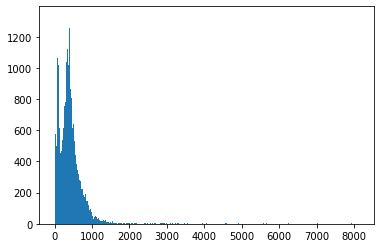

In [54]:
plt.hist([len(x) for x in X],bins =700)
plt.show() 

In [55]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1580

In [56]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)


In [57]:
len(X[101])

1000

In [58]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [59]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
   weight_matrix[i] = model.wv[word]

   return weight_matrix


In [60]:
embedding_vectors = get_weight_matrix(w2v_model)

In [61]:
embedding_vectors.shape


(231846, 100)

In [62]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable= False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer ='adam', loss='binary_crossentropy' , metrics=['acc'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23184600  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,301,977
Trainable params: 117,377
Non-trainable params: 23,184,600
_________________________________________________________________


In [68]:
X_train, X_test , y_train, y_test= train_test_split(X,y)

In [65]:
model.fit( X_train, y_train, validation_split = 0.3,epochs=6)

Epoch 1/6
737/737 [==============================] - 673s 905ms/step - loss: 0.6616 - acc: 0.5923 - val_loss: 0.6581 - val_acc: 0.5893
Epoch 2/6
737/737 [==============================] - 668s 907ms/step - loss: 0.6582 - acc: 0.5960 - val_loss: 0.6555 - val_acc: 0.5994
Epoch 3/6
737/737 [==============================] - 669s 908ms/step - loss: 0.6573 - acc: 0.5985 - val_loss: 0.6550 - val_acc: 0.5974
Epoch 4/6
737/737 [==============================] - 669s 908ms/step - loss: 0.6587 - acc: 0.5980 - val_loss: 0.6663 - val_acc: 0.5890
Epoch 5/6
737/737 [==============================] - 664s 902ms/step - loss: 0.6581 - acc: 0.5993 - val_loss: 0.6553 - val_acc: 0.6014
Epoch 6/6
737/737 [==============================] - 665s 903ms/step - loss: 0.6561 - acc: 0.5977 - val_loss: 0.6555 - val_acc: 0.5994


In [66]:
y_pred =(model.predict(X_test) >=0.5).astype(int)

In [69]:
accuracy_score(y_test, y_pred)

0.49915367483296214

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      5892
           1       0.47      0.45      0.46      5333

    accuracy                           0.50     11225
   macro avg       0.50      0.50      0.50     11225
weighted avg       0.50      0.50      0.50     11225



In [71]:
x = ['this is a news']

In [72]:
X_test

array([[    0,     0,     0, ...,   112,  1287,  1378],
       [    0,     0,     0, ...,    27,     1,   805],
       [    0,     0,     0, ...,     1,  2427,   782],
       ...,
       [    0,     0,     0, ...,   175,  2676,  1127],
       [    0,     0,     0, ...,   474,   175,  6650],
       [    0,     0,     0, ...,   619,   599, 97086]], dtype=int32)

In [78]:
x = ['India reported 2,541 fresh Covid-19 cases in the last 24 hours ending at 8 am Monday, marginally lower than 2,593 infections recorded the previous day, the Union Health Ministry’s data showed. The total number of active cases of the country now stands at 16,522. As many as 30 deaths were reported Monday, taking the death toll to 5,22,223.']
x =tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

array([[1]])

In [79]:
x = ['this is a news']
x =tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

array([[0]])